# Ising model using python

Pseudo code
```python
for every point in the grid:
    energy = my spin * sum of all of the spins (+1 or -1) of neighboring points
    if energy is improved by switching:
        switch
    else if we're particulalry unlucky
        switch anyway
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def periodicalize(lattice):
    n, m = lattice.shape
    n -= 1
    m -= 1
    
    lattice[:, 0] = lattice[:, m - 1]
    lattice[:, m] = lattice[:, 1]
    lattice[0, :] = lattice[n - 1, :]
    lattice[n, :] = lattice[1, :]
    
    return lattice

In [3]:
# Initialize Random Lattice
def init(n, m=None, random=True):
    if m is None:
        m = n
    if random:
        field = np.random.choice([-1, 1], size=[n, m])  # Random Spins
    else:
        field = np.ones([n, m])
    
    # add bounds
    lattice = np.zeros([n + 2, m + 2])
    lattice[1:n + 1, 1:m + 1] = field
    
    return periodicalize(lattice)

In [4]:
# Implement Ising Model Steps
def step(old_field, J=1, kbT=1):
    n, m = f.shape
    new_field = old_field.copy()
    beta = 1 / kbT
    
    for i in range(1, n-1):
        for j in range(1, m-1):
            Hamiltonian_old = - J * old_field[i, j] * (  # eigener Spin
                old_field[i-1, j] +  # alle naechsten Nachbarn
                old_field[i+1, j] +
                old_field[i, j-1] +
                old_field[i, j+1]
            )
            Hamiltonian_new = - Hamiltonian_old  # Energie falls geflippt wuerde
            deltaE = Hamiltonian_new - Hamiltonian_old
            
            # Flip spin if energy is minimized after flip
            if deltaE < 0:
                new_field[i, j] *= -1
            # Dont do anything if energy is same
            elif deltaE == 0:
                pass
            # Random spin flip if unlucky
            elif np.exp(- beta * deltaE) > np.random.rand():
                new_field[i, j] *= -1
                
                
    return periodicalize(new_field)

In [74]:
def middle_energy(lattice, J=1):
    n, m = lattice.shape
    
    Hamiltonian = 0
    for i in range(1, n-1):
        for j in range(1, m-1):
            Hamiltonian += - J * lattice[i, j] * (  # eigener Spin
                lattice[i-1, j] +  # alle naechsten Nachbarn
                lattice[i+1, j] +
                lattice[i, j-1] +
                lattice[i, j+1]
            )
    return Hamiltonian / (4 * J) / ((m - 2) * (n - 2))

In [75]:
# Define Start Values
steps = 1000 #+ 10000
n = 10
J = 1
kbT = 1 * J
f = init(n, random=True)

images = [f]

energies = []

# Run Model, Save Every Step
for i in range(steps):
    images.append(step(images[-1].copy(), J=J, kbT=kbT))
    energies.append(middle_energy(images[-1], J))

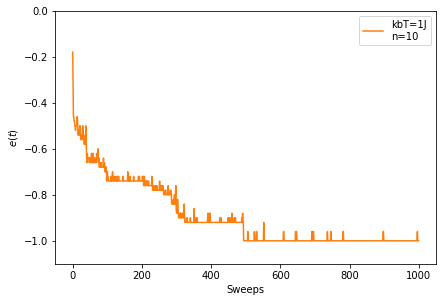

In [76]:
def plot_energies(energies, kbT, n):
    fig, ax = plt.subplots()
    ax.plot(range(len(energies)), energies, 'C1-', label='kbT={}J\nn={}'.format(kbT, n))
    ax.set_xlabel('Sweeps')
    ax.set_ylabel(r'$e(t)$')
    ax.set_ylim([-1.1, 0])
    ax.legend()
    fig.tight_layout(pad=0)
    return fig

energyfig = plot_energies(energies, kbT, n)
energyfig;

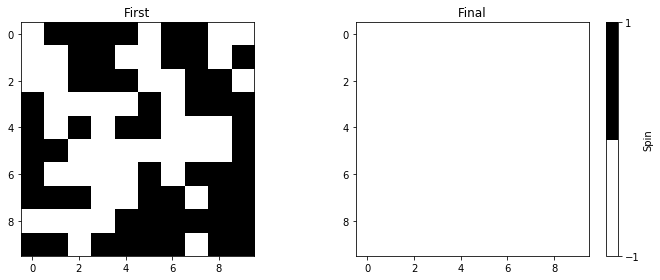

In [53]:
# Display Lattice After MC
first = images[0]
final = images[-1]

fig = plt.figure()
fig.set_size_inches([10, 4])
ax_first = fig.add_subplot(121)
ax_final = fig.add_subplot(122)

cmap = plt.get_cmap('binary', 2)

im_first = ax_first.imshow(first[1:n+1, 1:n+1], cmap=cmap)
im_final = ax_final.imshow(final[1:n+1, 1:n+1], cmap=cmap)

cbar = fig.colorbar(im_first)
cbar.set_ticks([-1, 1])
cbar.ax.set_ylabel("Spin")

ax_first.set_title("First")
ax_final.set_title("Final")
fig.tight_layout()
fig;